In [100]:
import nibabel as nib
import numpy as np
import os
import pandas as pd
import fnmatch
import matplotlib.pyplot as plt
import math

In [101]:
# define relative file names
fn_b0 = '/media/data/preschool_examples/ANTs/PS14_001/dti_b0_n4.nii'
fn_fa = '/media/data/preschool_examples/DTI/PS14_001/dti_fa.nii'
fn_v1 = '/media/data/preschool_examples/DTI/PS14_001/dti_v1.nii'
fn_BODY_CC = '/media/data/preschool_examples/DTI/PS14_001/PS14_001/PS14_001_UF_R.nii'
fn_qsm = '/media/data/preschool_examples/QSM/QSM_SPGR_GE_halfpi/LBV/chi_iLSQR_peel1_RAS_2dti.nii'

# load in the nii files
nii_b0 = nib.load(fn_b0)
nii_fa = nib.load(fn_fa)
nii_v1 = nib.load(fn_v1)
nii_BODY_CC = nib.load(fn_BODY_CC)
nii_qsm = nib.load(fn_qsm)

# get data from nii
nii_b0_data = nii_b0.get_data()
nii_fa_data = nii_fa.get_data()
nii_v1_data = nii_v1.get_data()
nii_BODY_CC_data = nii_BODY_CC.get_data()
nii_qsm_data = nii_qsm.get_data()


In [102]:
# extract BODY_CC
BODY_CC_fa = nii_fa_data[nii_BODY_CC_data > 0]
BODY_CC_qsm = nii_qsm_data[nii_BODY_CC_data > 0]

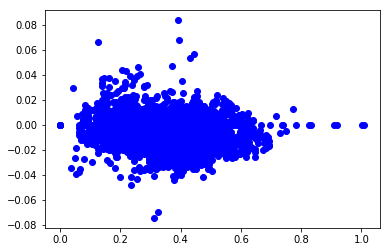

In [103]:
# plot FA against QSM
plt.plot(BODY_CC_fa, BODY_CC_qsm, 'bo')

In [104]:
# calculate sin(alpha) relative to B0 from V1
v1_cos = nii_v1_data[:,:,:,2][nii_BODY_CC_data > 0]
v1_sin = np.sqrt(1-np.square(v1_cos))

In [105]:
v1_sin

array([0.8223261 , 0.78534967, 0.83104104, ..., 0.96956074, 0.8472937 ,
       0.8995    ], dtype=float32)

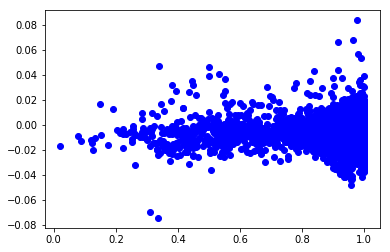

In [106]:
plt.plot(v1_sin, BODY_CC_qsm, 'bo')